# Les tests statistiques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr



In [2]:
df=pd.read_csv('weight-height-bmi.csv')
df.head()

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight


In [3]:
df.nunique()

Gender        2
Height    10000
Weight    10000
BMI           4
dtype: int64

# Test d'une variable quantitative

In [4]:
df['Height'].mean()

1.6857360177710958

On veut faire un test statistique pour verifier si notre la moyenne de taille de notre échantillon est correcte par rapport à la population.
On suppose que la taille a une distribution normale.

In [5]:
tset, pval = ttest_1samp(df['Height'], 1.68)

print("p-values",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 4.512370903373828e-09
 we are rejecting null hypothesis


# Correlation entre une variable quantitative et qualitative

In [6]:
#ANOVA (F-TEST) 
df_anova = pd.read_csv('weight-height-bmi.csv')
df_anova = df_anova[['Weight','BMI']]
grps = pd.unique(df_anova.BMI.values)
print(grps)
d_data = {grp:df_anova['Weight'][df_anova.BMI == grp] for grp in grps}
print(d_data) 


['Obesity' 'Normal' 'Overweight' 'Underweight']
{'Obesity': 0       109.720985
3        99.809504
33       93.069649
59       95.039544
78       89.108085
           ...    
4846     87.489569
4861    102.504845
4869    102.229926
4968     85.892814
4997     90.353440
Name: Weight, Length: 255, dtype: float64, 'Normal': 1       73.622732
5       69.042216
22      67.663936
24      73.484921
29      70.008586
          ...    
9994    50.135381
9995    62.041159
9997    58.275377
9998    74.322166
9999    51.550324
Name: Weight, Length: 4114, dtype: float64, 'Overweight': 2       96.497550
4       93.598619
6       83.428219
7       76.190352
8       79.800187
          ...    
9981    61.488655
9982    80.735777
9985    77.343883
9992    62.909437
9996    77.504315
Name: Weight, Length: 5589, dtype: float64, 'Underweight': 5009    47.242314
5191    41.153749
5214    38.098588
5360    31.289924
5394    42.743031
5605    41.747675
5655    41.174682
5740    36.528335
5883    39.412932
626

In [7]:
F, p = f_oneway(d_data['Obesity'], d_data['Normal'], d_data['Overweight'],d_data['Underweight'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


# Correlation entre deux variables qualitatives

In [8]:
contingency_table=pd.crosstab(df["Gender"],df["BMI"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 BMI     Normal  Obesity  Overweight  Underweight
Gender                                          
Female    3887        0        1071           42
Male       227      255        4518            0


<ipython-input-9-e54aebe76170>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


<Figure size 432x288 with 0 Axes>

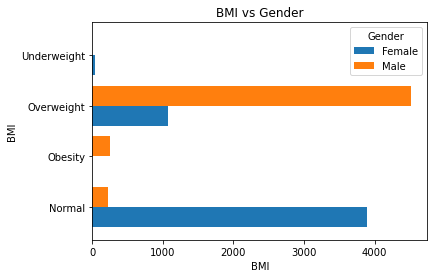

In [9]:
fig=plt.figure()
contingency_table.T.plot(kind='barh', ylabel='frequence', width=0.8)

plt.title('BMI vs Gender')
ax=plt.axes()
ax=ax.set(xlabel='BMI')

In [10]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)

0.0


In [11]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[3887    0 1071   42]
 [ 227  255 4518    0]]


In [12]:
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[2057.   127.5 2794.5   21. ]
 [2057.   127.5 2794.5   21. ]]


In [13]:
no_of_rows=len(contingency_table.iloc[:,0])
no_of_columns=len(contingency_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",ddof)

Degree of Freedom:  3


In [14]:
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 3511.1011181332037
critical_value: 7.814727903251179
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 3511.1011181332037
critical_value: 7.814727903251179
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# Chi square (deux variables catégoriques) pour une autre base de données

In [ ]:
df = pd.read_csv('tips.csv')
df.head()

In [ ]:
contigency= pd.crosstab(df['sex'], df['smoker']) 
contigency

In [ ]:
contigency_pct = pd.crosstab(df['sex'], df['smoker'], normalize='index')
contigency_pct

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

In [ ]:
dof

# deux variables numeriques

La on veut voir la relation entre la taille et le poids.

In [15]:
df=pd.read_csv('weight-height-bmi.csv')
df.head()

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight


Text(0.5, 1.0, 'Weight vs Height')

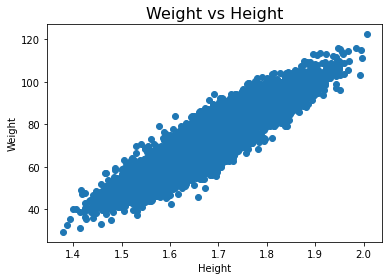

In [16]:
fig=plt.figure()
ax=plt.axes()
x=df['Height']
y=df['Weight']
plt.scatter(x,y)
ax=ax.set(xlabel='Height', ylabel='Weight')
plt.title('Weight vs Height', fontsize=16)

In [17]:
df_male=df[df['Gender']=='Male']
df_male

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
...,...,...,...,...
4995,Male,1.749046,80.345228,Overweight
4996,Male,1.751925,72.250505,Normal
4997,Male,1.702150,90.353440,Obesity
4998,Male,1.817566,84.325433,Overweight


Text(0.5, 1.0, 'Fréquence en fonction de l age')

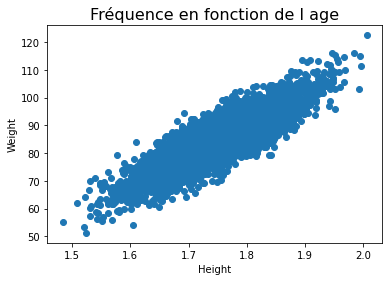

In [18]:
fig=plt.figure()
ax=plt.axes()
x=df_male['Height']
y=df_male['Weight']
plt.scatter(x,y)
ax=ax.set(xlabel='Height', ylabel='Weight')
plt.title('Fréquence en fonction de l age', fontsize=16)

In [19]:
r,p=pearsonr(df['Height'],df['Weight'])
print(p)

0.0


In [20]:
#autre méthode
my_rho = np.corrcoef(df_male['Height'], df_male['Weight'])

print(my_rho)

[[1.         0.86297885]
 [0.86297885 1.        ]]
